Importing the dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST dataset from keras

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#Shape of numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape ,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


6000 is how much image we have
2nd and 3rd parameter are pixel values i.e 28 X 28
if we have rgb image we must convert it to a greyscale image

Test data =10000 images

Grayscale image ------ 1 color chnnel

In [ ]:
#printing 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


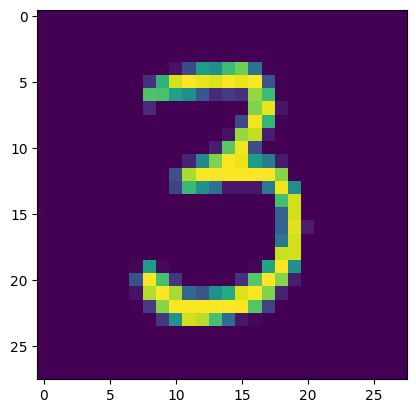

3


In [ ]:
#Display an image

plt.imshow(X_train[50])
plt.show()

# print corresponding label
print(Y_train[50])

Image labels

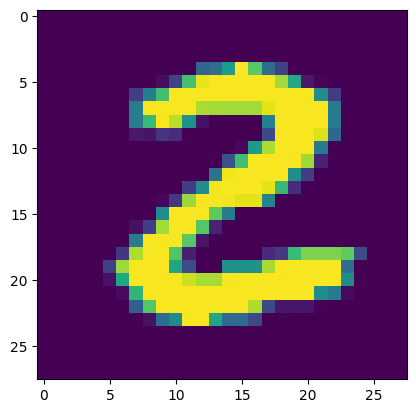

In [ ]:
plt.imshow(X_train[25])
plt.show()

plt.show(Y_train[25])

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
#unique labels

print(np.unique(Y_train))     # Y_train (Digits labeled [0-9] for training data)

print(np.unique(Y_test))      # Y_test  (Digits labeled [0-9] for testing data)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have same dimension in the dataset ; if not we have to resize all the images to a common dimension

In [ ]:
# Scaling the images

# intensity of color is from 0 to 255 we have to normalize them to 0 to 1

X_train = X_train / 255
X_test = X_test / 255

0 / 255 = 0

255 / 255 = 1

So, all the values lie between 0 and 1

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Build the Neural Network

1) CNN is used in the purpose of image recognition

2) RNN is used int the purpose of text, audio recognition

In [ ]:
# Setting the layers of Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    # Row and column in a single line ------Flatten (matrix to single dimension )
    keras.layers.Dense(50,activation='relu'),

    keras.layers.Dense(50,activation='relu'),

    keras.layers.Dense(10,activation='sigmoid')     # 10 = no. of classes in labels  [ 0 - 9 ]
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training a model

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.9111
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1409 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1032 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.037

**Traing data accuracy = 98.76**

In [ ]:
# Accuracy of test data

loss,accuracy=model.evaluate(X_test,Y_test)

print(accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9751
0.9750999808311462


**Test data accuracy = 97.5**

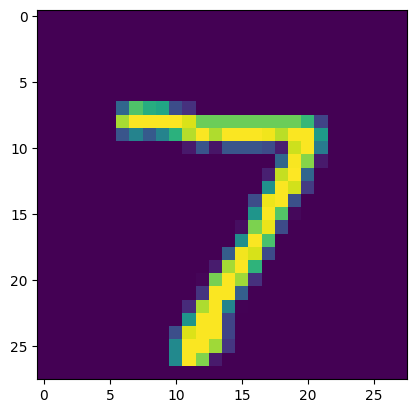

In [ ]:
#  first data point in test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


**Now check for individual prediction**

In [ ]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.2930498e-01 1.8467228e-03 2.3532651e-01 9.3540382e-01 9.3590220e-09
 1.5900787e-02 6.0371849e-06 9.9999899e-01 2.4663706e-01 5.3299695e-01]


**Above values represent the probability of every label i.e. from 0 to 9**

In [ ]:
# converting prediction probabilities to class label

label_first_image = np.argmax(Y_pred[0])
print(label_first_image)

7


In [ ]:
# Converting prediction probability to class label for all data points

Y_pred_label=[np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[1.2930498e-01 1.8467228e-03 2.3532651e-01 ... 9.9999899e-01
  2.4663706e-01 5.3299695e-01]
 [7.6993466e-08 9.9480861e-01 1.0000000e+00 ... 4.8446882e-11
  2.1851141e-02 8.7878244e-10]
 [6.0614967e-04 9.9991405e-01 2.0747387e-01 ... 3.0239287e-01
  7.1715158e-01 1.6264372e-02]
 ...
 [1.3253523e-07 1.2388894e-04 1.8660499e-05 ... 2.0603886e-01
  7.4137248e-02 9.9584538e-01]
 [2.6642680e-04 2.7260699e-04 6.1002515e-06 ... 7.1601222e-05
  9.8848259e-01 1.7783580e-07]
 [6.4437717e-07 1.2185058e-07 9.8710984e-07 ... 8.6819900e-06
  5.4309107e-03 1.0585936e-05]]


Y_test --------------> true labels

Y_pred_label -------------> predicted label

Confusion matrix

In [ ]:
con_mat=confusion_matrix(Y_test,Y_pred_label)
print(con_mat)

tf.Tensor(
[[ 961    0    3    0    1    4    4    2    4    1]
 [   0 1124    2    2    0    1    2    1    3    0]
 [   3    1  999    7    1    1    2    7   11    0]
 [   0    1    4  976    0   12    0    3    6    8]
 [   0    0    0    0  967    0    3    3    1    8]
 [   2    0    0    9    2  874    1    0    3    1]
 [   3    2    2    0    4   15  928    1    3    0]
 [   1    3    8    3    1    1    0 1002    0    9]
 [   2    1    1    4    4    4    0    2  952    4]
 [   1    6    0    4   13    8    0    4    6  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

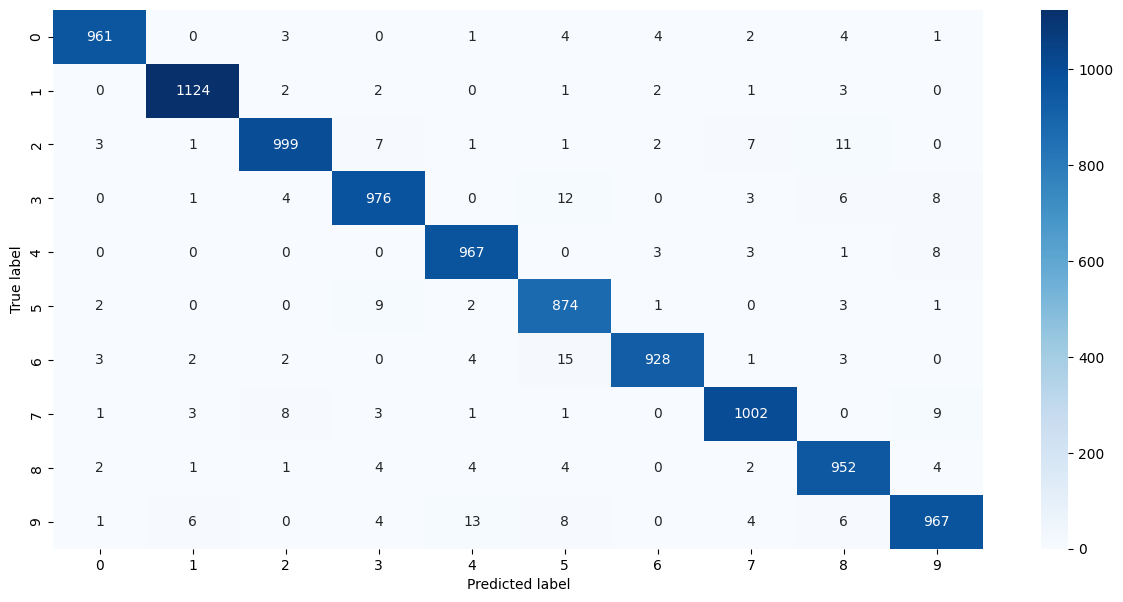

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Building a predictive system

In [ ]:
img_path='/content/MNIST_digit.png'
# Convert the dimension

img=cv2.imread(img_path)

In [ ]:
type(img)

numpy.ndarray

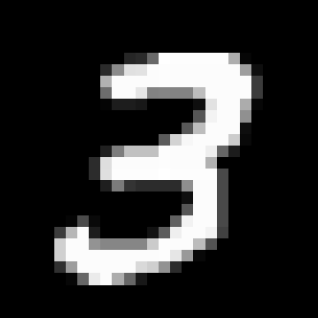

In [ ]:
cv2_imshow(img)

In [ ]:
print(img.shape)

(318, 318, 3)


In [ ]:
 # Convering an rgb image to greyscale

 grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
img_resize=cv2.resize(grayscale,(28,28))

In [ ]:
img_resize.shape

(28, 28)

In [ ]:
cv2_imshow(img_resize)

In [ ]:
img_resize=img_resize/255

In [ ]:
img_reshaped=np.reshape(img_resize , [1,28,28])

In [ ]:
input_pred=model.predict(img_reshaped)
print(input_pred)

1/1 [==============================] - 0s 39ms/step
[[7.4344814e-07 1.1043095e-02 1.4504220e-02 1.0000000e+00 7.5925571e-11
  1.0265390e-01 5.3027444e-11 4.2151678e-02 9.4223344e-01 8.6494845e-01]]


In [ ]:
input_pred_label=np.argmax(input_pred)
print(input_pred_label)

3


**Predictive System**

Path of image/content/MNIST_digit.png


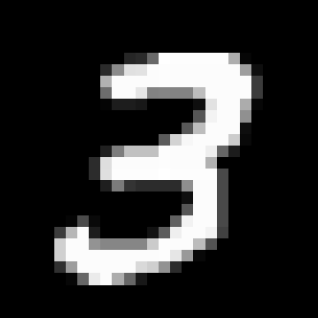

1/1 [==============================] - 0s 71ms/step
The Handwritten Digit is recognised as :  3


In [ ]:
img_path=input('Path of image')

img=cv2.imread(img_path)

cv2_imshow(img)

grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img_resize=cv2.resize(grayscale,(28,28))

img_reshaped=np.reshape(img_resize , [1,28,28])

input_pred=model.predict(img_reshaped)

input_pred_label=np.argmax(input_pred)

print('The Handwritten Digit is recognised as : ', input_pred_label)